In [35]:
import numpy as np
import pandas as pd
from scipy.io import loadmat
from random import sample
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [59]:
pd.set_option('max_rows', 7)
%matplotlib inline
#plt.rcParams['figure.figsize'] = 10, 10

In [4]:
data = loadmat('ex3data1.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Oct 16 13:09:09 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'y': array([[10],
        [10],
        [10],
        ...,
        [ 9],
        [ 9],
        [ 9]], dtype=uint8)}

In [92]:
X = data['X']
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
y = data['y']
y

array([[10],
       [10],
       [10],
       ...,
       [ 9],
       [ 9],
       [ 9]], dtype=uint8)

In [83]:
#generate 100 random indexes
random_indexes = sample(range(5000), 100)
X[random_indexes[0]]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.31059368e-04,
       -7.06758795e-04, -8.13146786e-03, -1.03713916e-02, -3.57672930e-03,
        2.38459967e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.15494694e-17, -1.93122987e-04,
       -1.34431625e-02,  

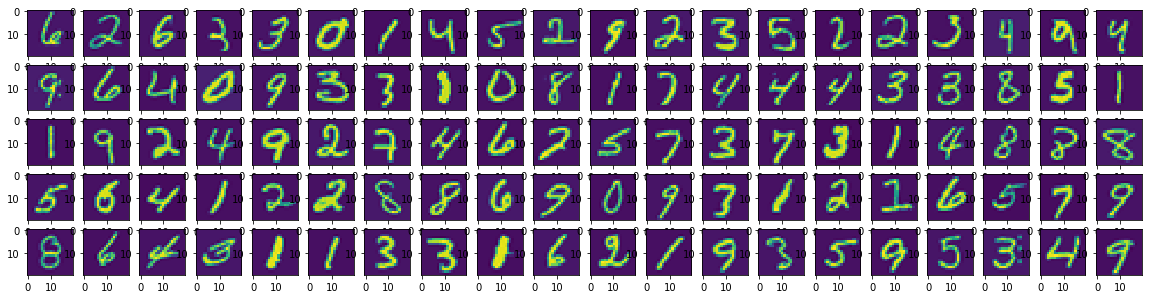

In [78]:
#draw 100 random images from grayscale pixels
IMG_COUNT = len(random_indexes)
IMG_SIZE = 20
    
fig = plt.figure(figsize=(20, 20))
for i in range(1, IMG_COUNT + 1):
    image = np.reshape(X[random_indexes[i - 1]], (IMG_SIZE, IMG_SIZE), order='F')
    fig.add_subplot(IMG_SIZE, IMG_SIZE, i)
    #plt.imshow(image, cmap=cm.gray)
    plt.imshow(image)

plt.show()

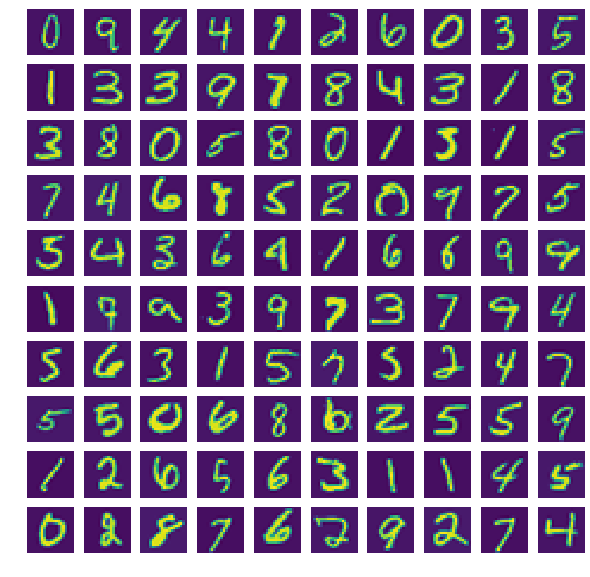

In [82]:
#draw it in a 10x10 matrix
FIG_SIZE = 10
_, axarr = plt.subplots(FIG_SIZE, FIG_SIZE, figsize=(FIG_SIZE, FIG_SIZE))
axarr
for i in range(FIG_SIZE):
    for j in range(FIG_SIZE):
        axarr[i, j].imshow(X[np.random.randint(X.shape[0])].\
                           reshape((IMG_SIZE, IMG_SIZE), order='F'))
        axarr[i, j].axis('off')

In [93]:
m, n = X.shape
ones = np.ones((m, 1))
X = np.hstack((ones, X))
n

400

In [71]:
def costFunction(theta, X, y, m):
    J = (-1/m) * (y.T @ np.log(sigmoid(X @ theta)) +
                 (1 - y.T) @ np.log(1 - sigmoid(X @ theta))) 
        
    return J